### Importing Packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

import seaborn as sns
sns.set()

import itertools 

import warnings
warnings.filterwarnings("ignore")

### Reading CSV Files of the Preprocessed Data

In [4]:
# reading modified dataset
file_name = 'new_train.csv'
data = pd.read_csv(file_name, sep=',', header=0).iloc[:-1]

# adding two extra features
data['Multi_Ticket'] = (data.Common_Ticket > 1).astype(int)
data['P3SorQ'] = (data.Pclass == 3).astype(int) * (data.Emb2 == 0).astype(int)
data['Age_Class'] = data.Age * data.Pclass
data['MonQorS'] = (data.Sex == 0).astype(int) * (data.Emb2 == 0).astype(int)

display(data)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Partner,Common_Ticket,Single_Fare,NN_Cabin,Cabin_Num,Being_MOD,Multi_Ticket,P3SorQ,Age_Class,MonQorS
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,...,1,1.0,7.25000,0,0.0,0,0,1,66.000000,1
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,...,1,2.0,35.64165,1,5.0,0,1,0,38.000000,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,...,0,1.0,7.92500,0,0.0,0,0,1,78.000000,0
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,...,1,2.0,26.55000,1,5.0,0,1,0,35.000000,0
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,...,0,1.0,8.05000,0,0.0,0,0,1,105.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0.0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,...,0,1.0,13.00000,0,0.0,0,0,0,54.000000,1
887,887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,...,0,1.0,30.00000,1,6.0,0,0,0,19.000000,0
888,888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.583132,1,2,W./C. 6607,...,3,4.0,5.86250,0,0.0,1,1,1,85.749395,0
889,889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,...,0,1.0,30.00000,1,5.0,0,0,0,26.000000,0


#### Report:
'new_train.csv' is the dataset modified in the Data_Analysis file. 4 new features with high correlations(something between 0.2 and 0.5) with 'Survived' feature are added to dataset. Their names represents their meaning.

### Splitting Training and Test Dataset

In [5]:
frac = 0.8   #The dataset is split with portion of 80% for training set and 20% for test set

train_data = data.iloc[:round(frac*len(data))]
test_data = data.iloc[round(frac*len(data)):]

display(train_data)
display(test_data)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Partner,Common_Ticket,Single_Fare,NN_Cabin,Cabin_Num,Being_MOD,Multi_Ticket,P3SorQ,Age_Class,MonQorS
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,...,1,1.0,7.250000,0,0.0,0,0,1,66.000000,1
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,...,1,2.0,35.641650,1,5.0,0,1,0,38.000000,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,...,0,1.0,7.925000,0,0.0,0,0,1,78.000000,0
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,...,1,2.0,26.550000,1,5.0,0,1,0,35.000000,0
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,...,0,1.0,8.050000,0,0.0,0,0,1,105.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,708,709,1.0,1,"Cleaver, Miss. Alice",1,22.000000,0,0,113781,...,0,6.0,25.258333,0,5.0,0,1,0,22.000000,0
709,709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",0,19.477412,1,1,2661,...,2,3.0,5.081933,0,0.0,0,1,0,58.432235,0
710,710,711,1.0,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,24.000000,0,0,PC 17482,...,0,1.0,49.504200,1,5.0,0,0,0,24.000000,0
711,711,712,0.0,1,"Klaber, Mr. Herman",0,32.252151,0,0,113028,...,0,1.0,26.550000,1,5.0,0,0,0,32.252151,1


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,...,Partner,Common_Ticket,Single_Fare,NN_Cabin,Cabin_Num,Being_MOD,Multi_Ticket,P3SorQ,Age_Class,MonQorS
713,713,714,0.0,3,"Larsson, Mr. August Viktor",0,29.000000,0,0,7545,...,0,1.0,9.4833,0,0.0,0,0,1,87.000000,1
714,714,715,0.0,2,"Greenberg, Mr. Samuel",0,52.000000,0,0,250647,...,0,2.0,6.5000,0,0.0,0,1,0,104.000000,1
715,715,716,0.0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",0,19.000000,0,0,348124,...,0,1.0,7.6500,1,2.0,0,0,1,57.000000,1
716,716,717,1.0,1,"Endres, Miss. Caroline Louise",1,38.000000,0,0,PC 17757,...,0,5.0,45.5050,1,5.0,0,1,0,38.000000,0
717,717,718,1.0,2,"Troutt, Miss. Edwina Celia ""Winnie""",1,27.000000,0,0,34218,...,0,1.0,10.5000,1,3.0,0,0,0,54.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0.0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,...,0,1.0,13.0000,0,0.0,0,0,0,54.000000,1
887,887,888,1.0,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,...,0,1.0,30.0000,1,6.0,0,0,0,19.000000,0
888,888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.583132,1,2,W./C. 6607,...,3,4.0,5.8625,0,0.0,1,1,1,85.749395,0
889,889,890,1.0,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,...,0,1.0,30.0000,1,5.0,0,0,0,26.000000,0


#### Report:
Training and Test datas are split.

#### Attention:
Features that are used in each method are results of optimizing Test dataset accuracy by using lots of different subsets of features.

### 3.1.Logistic Regression

In [7]:
features = ['Sex', 'Age', 'SibSp', 'Common_Ticket', 'NN_Cabin', 'Being_MOD', 'Multi_Ticket', 'P3SorQ']

X_train = train_data.loc[:, features]
Y_train = train_data.loc[:, 'Survived']

X_test = test_data.loc[:, features]
Y_test = test_data.loc[:, 'Survived']

# an instance of the class
LogRess = LogisticRegression(solver='liblinear')

LogRess.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

#### Report:
Optimal features for logistic regression method are selected and an instance of LogisticRegression method is trained on training dataset.

### 3.1.Evaluating Logistic Regression

-------------------------------- Accuracy --------------------------------
Logistic Regression Training Accuracy:	0.7741935483870968
Logistic Regression Test Accuracy:	0.8033707865168539
--------------------------------------------------------------------------


,Feature,Coefficient
0,Sex,2.622335
4,Partner,1.144275
6,NN_Cabin,0.417665
3,Emb1,-0.028983
1,Age,-0.030443
2,SibSp,-0.320433
5,Single_Fare,-0.614689
7,P3SorQ,-1.045628


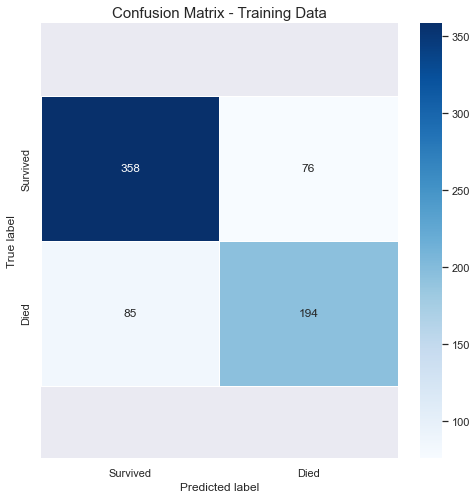

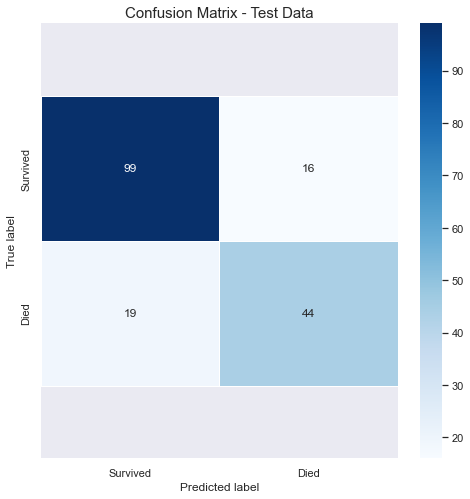

In [39]:
# test data accuracy
LR_ts_Acc = LogRess.score(X_test, Y_test)

# train data accuracy
LR_tr_Acc = LogRess.score(X_train, Y_train)

print("-------------------------------- Accuracy --------------------------------")
print('Logistic Regression Training Accuracy:\t{0}'.format(LR_tr_Acc))
print('Logistic Regression Test Accuracy:\t{0}'.format(LR_ts_Acc))
print("--------------------------------------------------------------------------")

# features importance
feature_imp = pd.DataFrame({'Feature': features,
                           'Coefficient': LogRess.coef_[0]}).sort_values('Coefficient', ascending=False)
display(feature_imp)

# confusion matrix for train data
Y_pred = LogRess.predict(X_train)
cn_matrix = confusion_matrix(Y_train, Y_pred)
df_cm = pd.DataFrame(cn_matrix, index=['Survived', 'Died'], columns=['Survived', 'Died'])

fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(df_cm, annot=True, linewidths=.5, cmap='Blues', fmt='g')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix - Training Data', size=15)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# confusion matrix for test data
Y_pred = LogRess.predict(X_test)
cn_matrix = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cn_matrix, index=['Survived', 'Died'], columns=['Survived', 'Died'])

fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(df_cm, annot=True, linewidths=.5, cmap='Blues', fmt='g')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix - Test Data', size=15)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Reports:
At first Test and Training Accuracies are reported. Features in the order of importance are gathered in a table. Importance of each feature is its coefficient in logistic regression trained model. As we see, 'Sex' feature has the most positive effect on 'Survivied' feature, which means women ('Sex' = 1) have had more chance to survive compared to men. And 'P3SorQ' has the most negative effect on 'Surviving' feature, which means those who have had Third Pclass ticket and embarked on S or Q harbors have lost their lives mostly.

---

Confusion matrix is also provided for both training and test datasets.

### 3.2.KNN

In [22]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Age&Sex', 'Partner', 'Single_Fare', 'NN_Cabin']

X_train = train_data.loc[:, features]
Y_train = train_data.loc[:, 'Survived']

X_test = test_data.loc[:, features]
Y_test = test_data.loc[:, 'Survived']

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# an instance of the class
knn = KNeighborsClassifier(n_neighbors=3, p=2)

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

#### Report:
Optimal features for KNN method are selected and an instance of KNN method is trained on training dataset. We also need feature scaling for both training and test dataset.

### 3.2.Evaluating KNN

-------------------------------- Accuracy --------------------------------
KNN Training Accuracy for p = 1:	0.8751753155680224
KNN Test Accuracy for p = 1:		0.8932584269662921
--------------------------------------------------------------------------

-------------------------------- Accuracy --------------------------------
KNN Training Accuracy for p = 2:	0.8737727910238429
KNN Test Accuracy for p = 2:		0.9101123595505618
--------------------------------------------------------------------------

-------------------------------- Accuracy --------------------------------
KNN Training Accuracy for p = 3:	0.8723702664796634
KNN Test Accuracy for p = 3:		0.9044943820224719
--------------------------------------------------------------------------



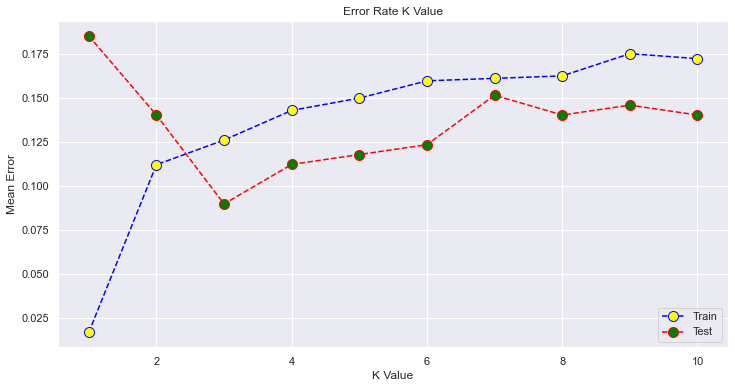

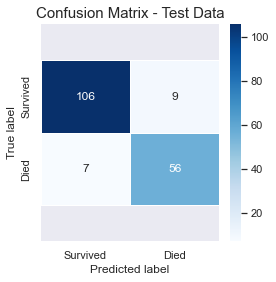

In [23]:
for p in range(1, 4):
    # an instance of the class
    knn = KNeighborsClassifier(n_neighbors=3, p=p)

    knn.fit(X_train, Y_train)

    # test data accuracy
    ts_Acc = knn.score(X_test, Y_test)

    # train data accuracy
    tr_Acc = knn.score(X_train, Y_train)

    print("-------------------------------- Accuracy --------------------------------")
    print('KNN Training Accuracy for p = {1}:\t{0}'.format(tr_Acc, p))
    print('KNN Test Accuracy for p = {1}:\t\t{0}'.format(ts_Acc, p))
    print("--------------------------------------------------------------------------\n")

ts_err = []
tr_err = []
    
for k in range(1, 11):
    # an instance of the class
    knn = KNeighborsClassifier(n_neighbors=k, p=2)

    knn.fit(X_train, Y_train)

    # test data accuracy
    ts_err.append(1.0 - knn.score(X_test, Y_test))

    # train data accuracy
    tr_err.append(1.0 - knn.score(X_train, Y_train))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), tr_err, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.plot(range(1, 11), ts_err, color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.legend(['Train', 'Test'])
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# an instance of the class
knn = KNeighborsClassifier(n_neighbors=3, p=2)

knn.fit(X_train, Y_train)

# test data accuracy
KNN_ts_Acc = knn.score(X_test, Y_test)

# train data accuracy
KNN_tr_Acc = knn.score(X_train, Y_train)

# confusion matrix for test data
Y_pred = knn.predict(X_test)
cn_matrix = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cn_matrix, index=['Survived', 'Died'], columns=['Survived', 'Died'])

fig = plt.figure(figsize=(4, 4))
hm = sns.heatmap(df_cm, annot=True, linewidths=.5, cmap='Blues', fmt='g')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix - Test Data', size=15)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Report:
KNN method with n_neighbors=3 and p norm=1,2,3 is implemented on training dataset and accuracies are reported above. As we see KNN with second norm has the best accuracy and has better performance on our features.

---

After that, KNN method with second norm is implemented for different number of neighbors and its error on both training and test dataset is plotted above. As we see, training error almost gets worse as K value increases and test error first decreases and then increases, which yields K = 3 as the best number of neighbors. This result seems reasonable because when you look at first five nearest points to your test sample, you are considering more generalization and you classify your sample with high level of confidence. Training error figure also shows that our samples are completely mixed together(they does'nt have separate clusters) as the error increases with higher k values.         

---

Confusion matrix for test data is also provided. Comparing this matrix to the same one in previous part shows that we are performing far more better on test dataset as the number of TP(True Positive) and TN(True Negative) samples increases by 9 and the number of FP(False Positive) and FN(False Negative) samples decreases by 9.

### 3.3.SVM

In [25]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Emb2', 'Age&Sex', 'Partner', 'NN_Cabin',
            'Cabin_Num', 'Being_MOD', 'Multi_Ticket']

X_train = train_data.loc[:, features]
Y_train = train_data.loc[:, 'Survived']

X_test = test_data.loc[:, features]
Y_test = test_data.loc[:, 'Survived']

#### Report:
Optimal features for SVM method are selected.

### 3.3.Evaluating SVM

In [26]:
SVM_tr_Acc = []
SVM_ts_Acc = []
for kernel in ['linear', 'rbf', 'poly']:
    if kernel == 'poly':
        # feature scaling
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        svm = SVC(kernel=kernel, degree=3)
    else:
        # an instance of the class
        svm = SVC(kernel=kernel, C=35, gamma=0.11)

    svm.fit(X_train, Y_train)

    # train data accuracy
    tr_Acc = svm.score(X_train, Y_train)
    SVM_tr_Acc.append(tr_Acc)
    Y_pred = svm.predict(X_train)
    tr_fscore = f1_score(Y_train, Y_pred)    
    
    # test data accuracy
    ts_Acc = svm.score(X_test, Y_test)
    SVM_ts_Acc.append(ts_Acc)
    Y_pred = svm.predict(X_test)
    ts_fscore = f1_score(Y_test, Y_pred)

    print("-------------------------------- kernel = {0} --------------------------------".format(kernel))
    print('SVM Train Accuracy:\t\t{0}'.format(tr_Acc))
    print('SVM Train F1 Score:\t\t{0}'.format(tr_fscore))
    print('SVM Test Accuracy:\t\t{0}'.format(ts_Acc))
    print('SVM Test F1 Score:\t\t{0}'.format(ts_fscore))
    print("------------------------------------------------------------------------------\n")

# best accuracies
SVM_tr_Acc = SVM_tr_Acc[1]
SVM_ts_Acc = SVM_ts_Acc[1]

-------------------------------- kernel = linear --------------------------------
SVM Train Accuracy:		0.782608695652174
SVM Train F1 Score:		0.7102803738317758
SVM Test Accuracy:		0.8033707865168539
SVM Test F1 Score:		0.7107438016528926
------------------------------------------------------------------------------

-------------------------------- kernel = rbf --------------------------------
SVM Train Accuracy:		0.9368863955119214
SVM Train F1 Score:		0.9158878504672897
SVM Test Accuracy:		0.8764044943820225
SVM Test F1 Score:		0.819672131147541
------------------------------------------------------------------------------

-------------------------------- kernel = poly --------------------------------
SVM Train Accuracy:		0.82328190743338
SVM Train F1 Score:		0.7613636363636364
SVM Test Accuracy:		0.8707865168539326
SVM Test F1 Score:		0.8099173553719008
------------------------------------------------------------------------------



#### Report:
At first, We implement SVM for different types of kernels. For 'linear' and 'rbf' kernel we does'nt use any feature scaling as the accuracies on test and training dataset appeared to be better in the absence of feature scaling. Values for 'C' and 'gamma' are manually tuned to have the best performance. But with 'poly' kernel we use feature scaling to have better accuracies. Accuracies for all three kernels are provided above. As we see, rbf kernel is the best kernel to use for our dataset.     

---

F1 Scores are also calculated for all kernels. F1 score is defined as the harmonic mean between precision and recall.

\begin{equation*}
\frac{TP}{TP+FP} = Precision
\end{equation*}

\begin{equation*}
\frac{TP}{TP+FN} = Recall
\end{equation*}

Sometimes Positive class is more important for us compared to negative class. So we want to have better precision value. On the other hand, sometimes negative class has higher priority for us and we want Recall measure to be high enough. As we see, in different problems Presicion and Recall have different importances, depending on the goal of classification. But some times both Recall and Precision measures are important to us, So what if a method has better Recall and worse Precision than another method? How are we supposed to decide? In these kind of situations, We can use F1 Score that considers both Precision and Recall measures.  
Looking at F1 Scores calculated above, We see that methods with high accuracies also have better F1 Scores and are supposed to be better classifiers for us. As we see rbf kernel has better F1 Scores too.

### 3.3.PCA

-------------------------------- Accuracy --------------------------------
Training Accuracy:	0.7475455820476858
Test Accuracy:		0.7752808988764045
--------------------------------------------------------------------------

-------------------------------- Accuracy --------------------------------
Training Accuracy:	0.761570827489481
Test Accuracy:		0.7696629213483146
--------------------------------------------------------------------------

-------------------------------- Accuracy --------------------------------
Training Accuracy:	0.7643758765778401
Test Accuracy:		0.7584269662921348
--------------------------------------------------------------------------

-------------------------------- Accuracy --------------------------------
Training Accuracy:	0.782608695652174
Test Accuracy:		0.7471910112359551
--------------------------------------------------------------------------

-------------------------------- Accuracy --------------------------------
Training Accuracy:	0.7854137447

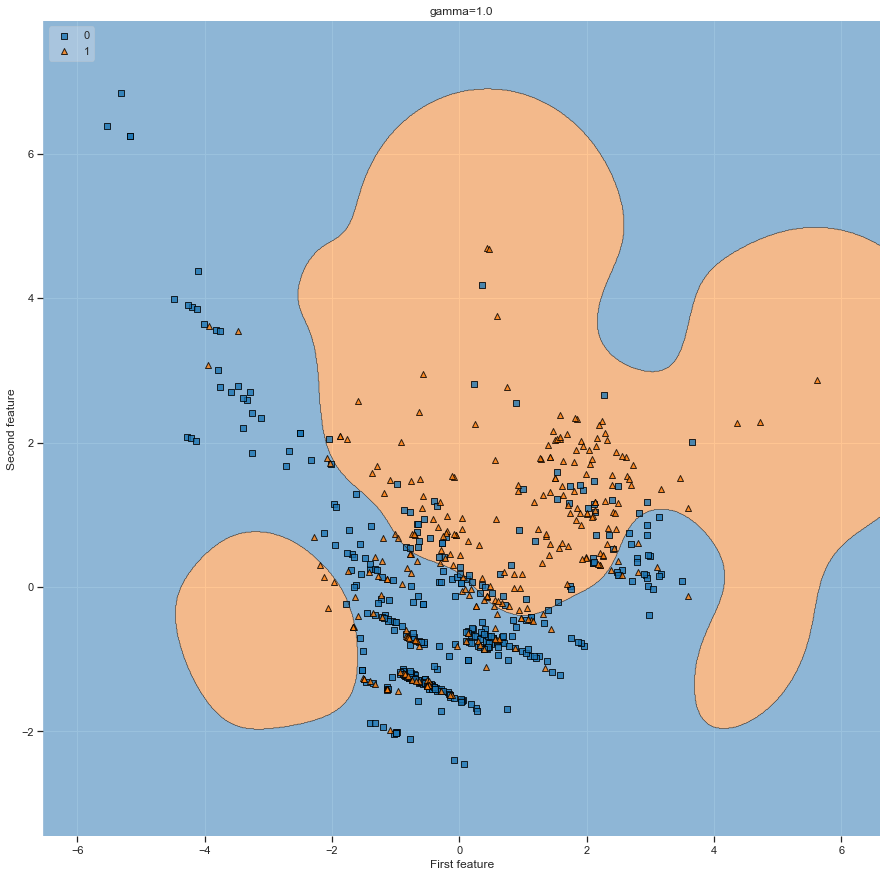

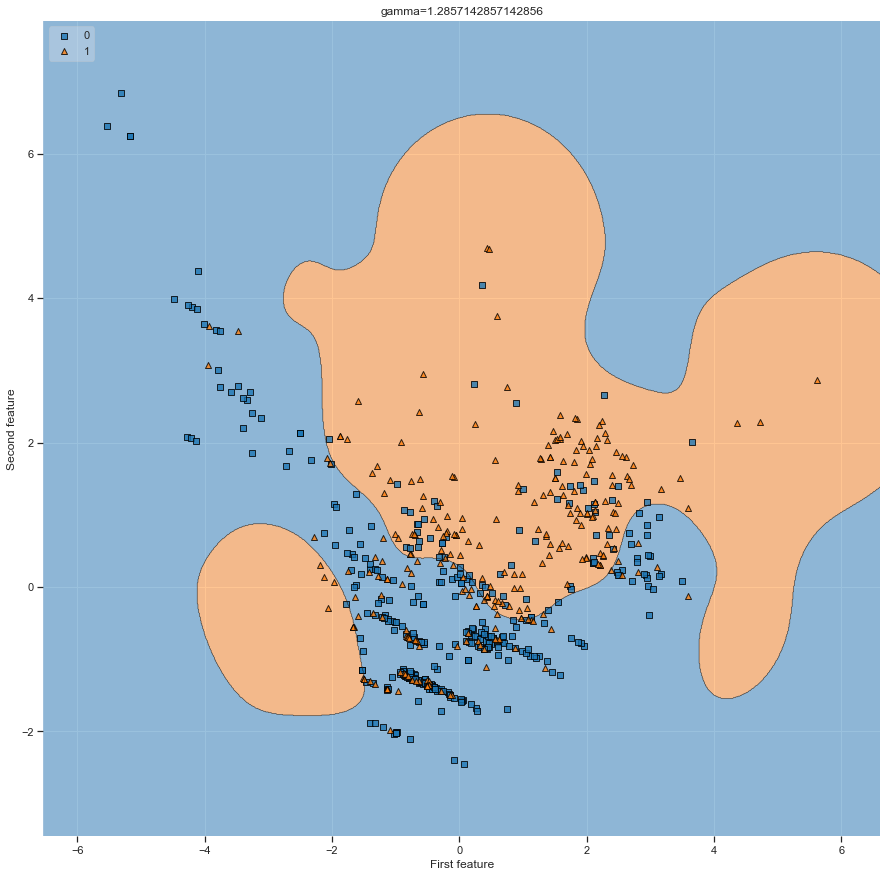

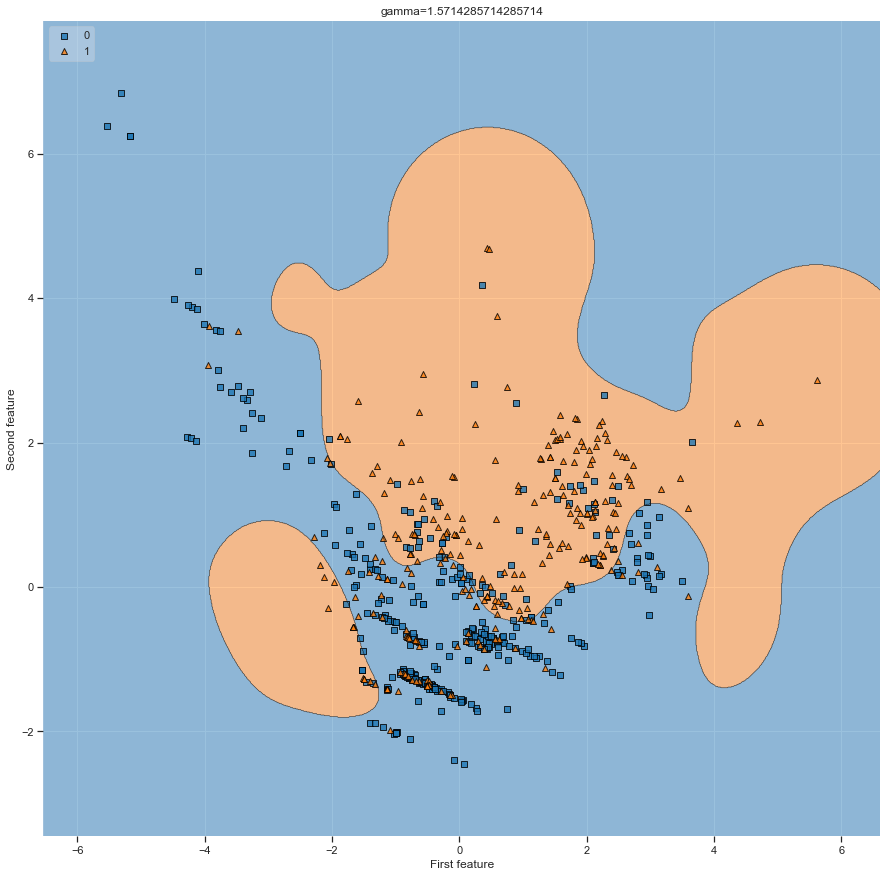

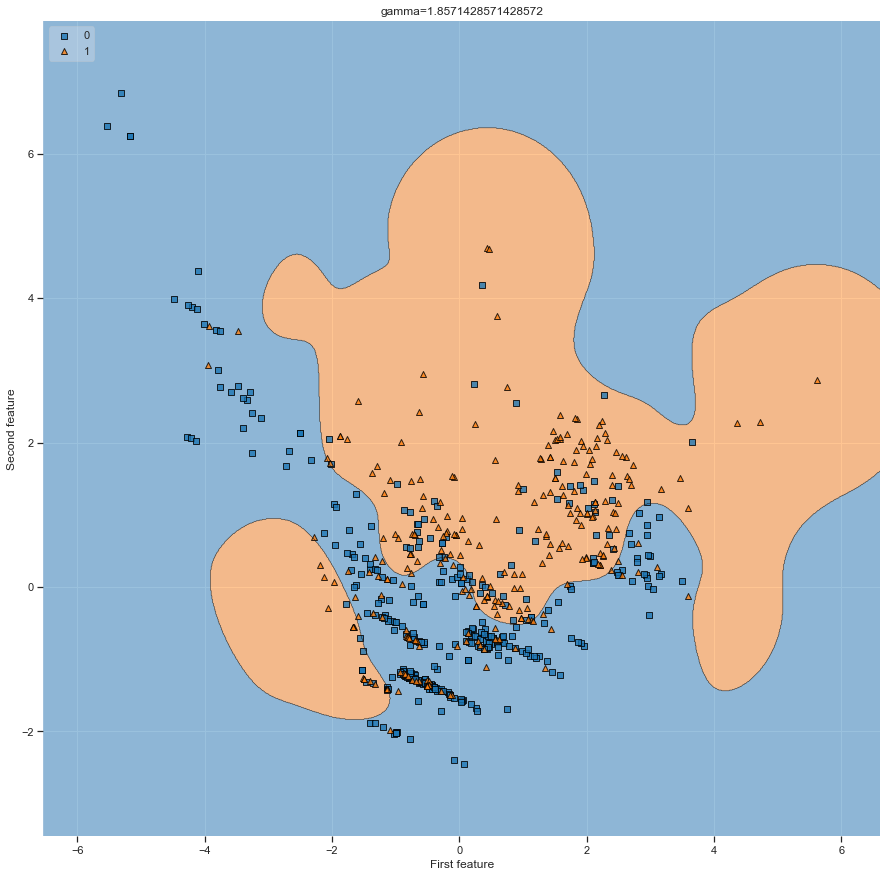

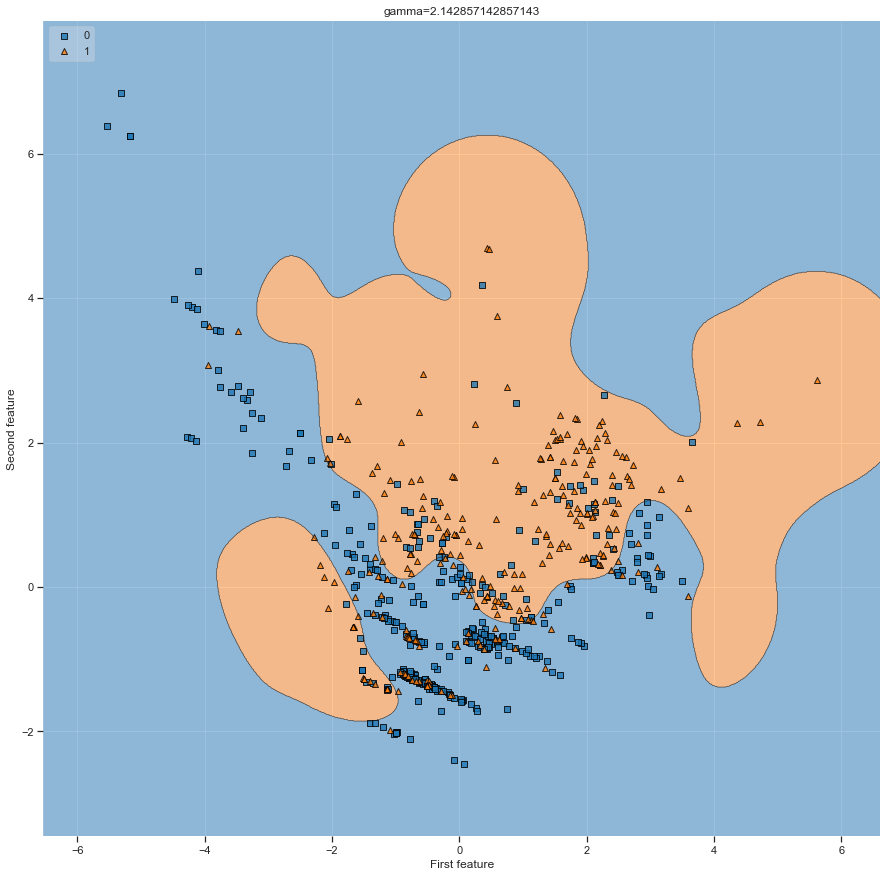

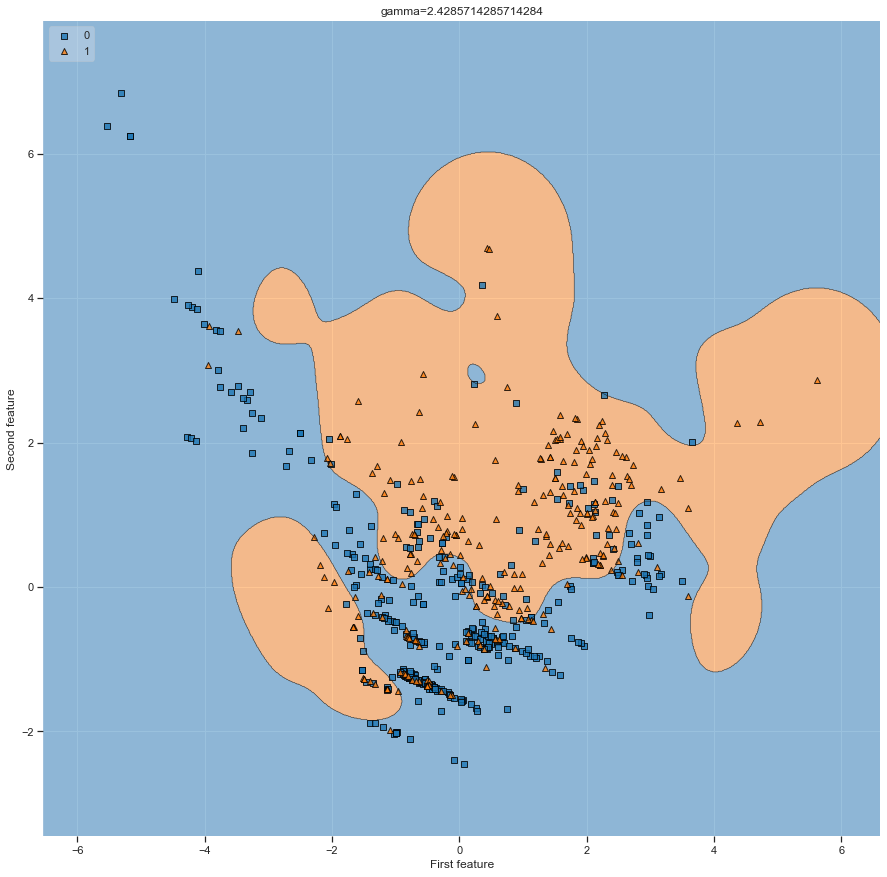

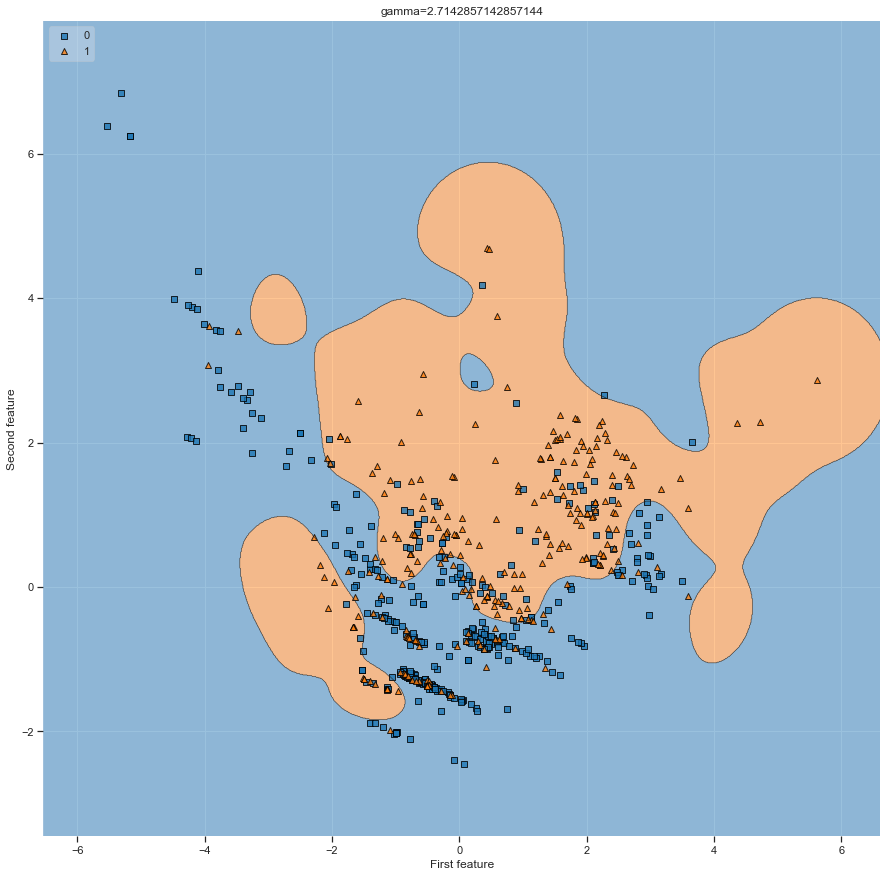

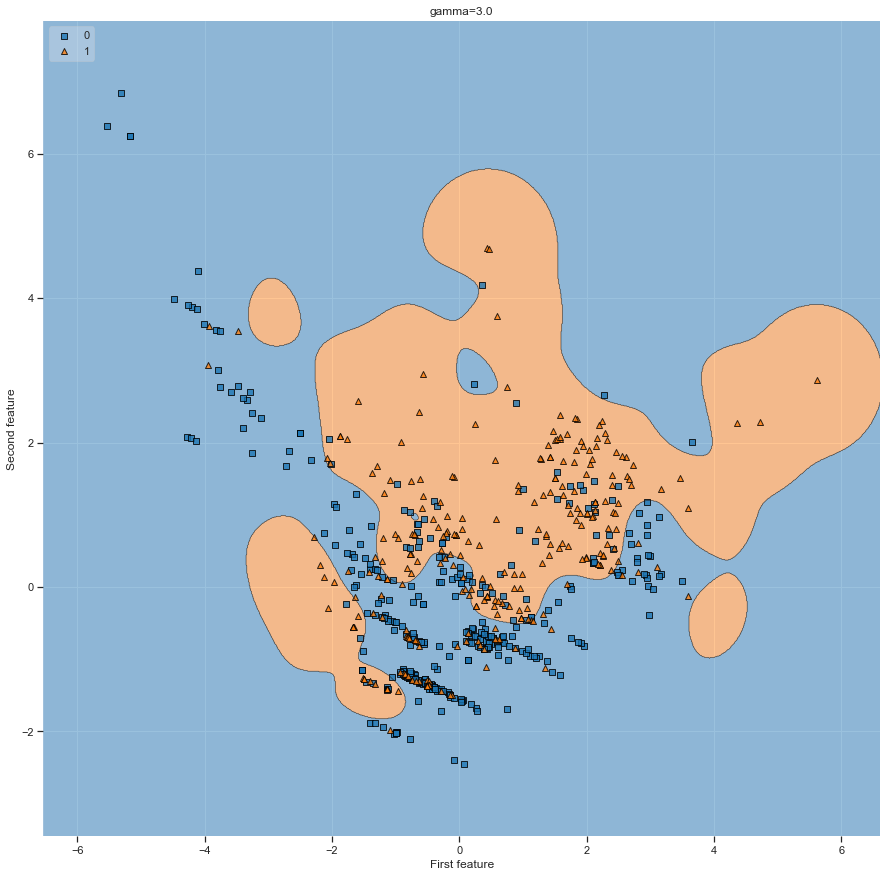

-------------------------------- Accuracy --------------------------------
Training Accuracy:	0.7994389901823282
Test Accuracy:		0.7528089887640449
--------------------------------------------------------------------------



In [41]:
# dimansionality reduction by PCA
pca = PCA(n_components=2)

X_tr_pca = pca.fit_transform(X_train)
X_ts_pca = pca.fit_transform(X_test)
grid_gamma = np.linspace(1, 3, 8)

for j in range(len(grid_gamma)):
    svm = SVC(gamma=grid_gamma[j], kernel='rbf').fit(X_tr_pca, Y_train)
    plt.figure(figsize=(15,15))
    plot_decision_regions(X_tr_pca, Y_train.to_numpy(dtype=int), clf=svm, legend=2)
    plt.title('gamma={}'.format(grid_gamma[j]))
    plt.xlabel('First feature')
    plt.ylabel('Second feature')
    ts_Acc = svm.score(X_ts_pca, Y_test)
    tr_Acc = svm.score(X_tr_pca, Y_train)
    print("-------------------------------- Accuracy --------------------------------")
    print('Training Accuracy:\t{0}'.format(tr_Acc))
    print('Test Accuracy:\t\t{0}'.format(ts_Acc))
    print("--------------------------------------------------------------------------\n")
# an instance of the class
# svm = SVC(kernel='rbf', gamma=1.8)

# svm.fit(X_tr_pca, Y_train)

# plt.figure(figsize=(8, 8))
# plot_decision_regions(X_tr_pca, Y_train.to_numpy(dtype=int), clf=svm, legend=2)
# plt.xlabel('First feature')
# plt.ylabel('Second feature')
# plt.title('SVM classifier after implementing PCA')
plt.show()

# test data accuracy
ts_Acc = svm.score(X_ts_pca, Y_test)

# train data accuracy
tr_Acc = svm.score(X_tr_pca, Y_train)

print("-------------------------------- Accuracy --------------------------------")
print('Training Accuracy:\t{0}'.format(tr_Acc))
print('Test Accuracy:\t\t{0}'.format(ts_Acc))
print("--------------------------------------------------------------------------\n")

#### Report:
At first, We reduce our dimensions to 2 by implementing PCA. After that, We use a SVM classifier with rbf kernel and high value of gamma(to see overfitting phenomenon better) and plot the training dataset with decision boundaries.   
As the plot shows and Accuracies confirm, our classifier is overfitting.

### 3.4.Naive Bayes Classifier

In [20]:
features = ['Sex', 'Age', 'Parch', 'Age&Sex', 'Partner', 'Common_Ticket', 'Multi_Ticket']


X_train = train_data.loc[:, features]
Y_train = train_data.loc[:, 'Survived']

X_test = test_data.loc[:, features]
Y_test = test_data.loc[:, 'Survived']

# an instance of the class
gnb = GaussianNB()

gnb.fit(X_train, Y_train)

# test data accuracy
GNB_ts_Acc = gnb.score(X_test, Y_test)

# train data accuracy
GNB_tr_Acc = gnb.score(X_train, Y_train)

print("-------------------------------- Accuracy --------------------------------")
print('Gaussian-NB Training Accuracy:\t\t{0}'.format(GNB_tr_Acc))
print('Gaussian-NB Test Accuracy:\t\t{0}'.format(GNB_ts_Acc))
print("--------------------------------------------------------------------------\n")

-------------------------------- Accuracy --------------------------------
Gaussian-NB Training Accuracy:		0.8050490883590463
Gaussian-NB Test Accuracy:		0.8595505617977528
--------------------------------------------------------------------------



#### Report:
Optimum features for Gaussian Naive Bayes Classifier are selected and an instance of it is trained on training dataset with default value for smoothing. Accuracies on both training and test dataset are reported above.

---

'var_smoothing' is a fraction of the largest variance of all features that is added to variances for calculation stability. If the ratio of data variance between dimensions is too small, it will cause numerical errors. To address this, the variance is artificially boosted by epsilon, a small fraction of the standard deviation of the largest dimension. The default value for 'var_smoothing' is 1e-9. As we increased its value and observed accuracies, We found that increasing it will have negative effect on accuracies of our model.

### 3.4.AUC for Gaussian-NB

In [21]:
# AUC for training data
Y_pred = gnb.predict(X_train)
fpr, tpr, thresholds = roc_curve(Y_train, Y_pred)
roc_auc_tr = auc(fpr, tpr)

# AUC for test data
Y_pred = gnb.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc_ts = auc(fpr, tpr)

print("-------------------------------- AUC --------------------------------")
print('Gaussian-NB AUC for Training:\t\t{0}'.format(roc_auc_tr))
print('Gaussian-NB AUC for Test:\t\t{0}'.format(roc_auc_ts))
print("---------------------------------------------------------------------\n")

-------------------------------- AUC --------------------------------
Gaussian-NB AUC for Training:		0.7860983102918588
Gaussian-NB AUC for Test:		0.8410628019323672
---------------------------------------------------------------------



#### Report:
AUC stands for Area Under Curve for ROC Curve. The ROC curve is created by plotting the true positive rate (TPR or Recall) against the false positive rate (FPR) at various threshold settings.

\begin{equation*}
\frac{TP}{TP+FN} = TPR
\end{equation*}

\begin{equation*}
\frac{FP}{FP+TN} = FPR
\end{equation*}

---

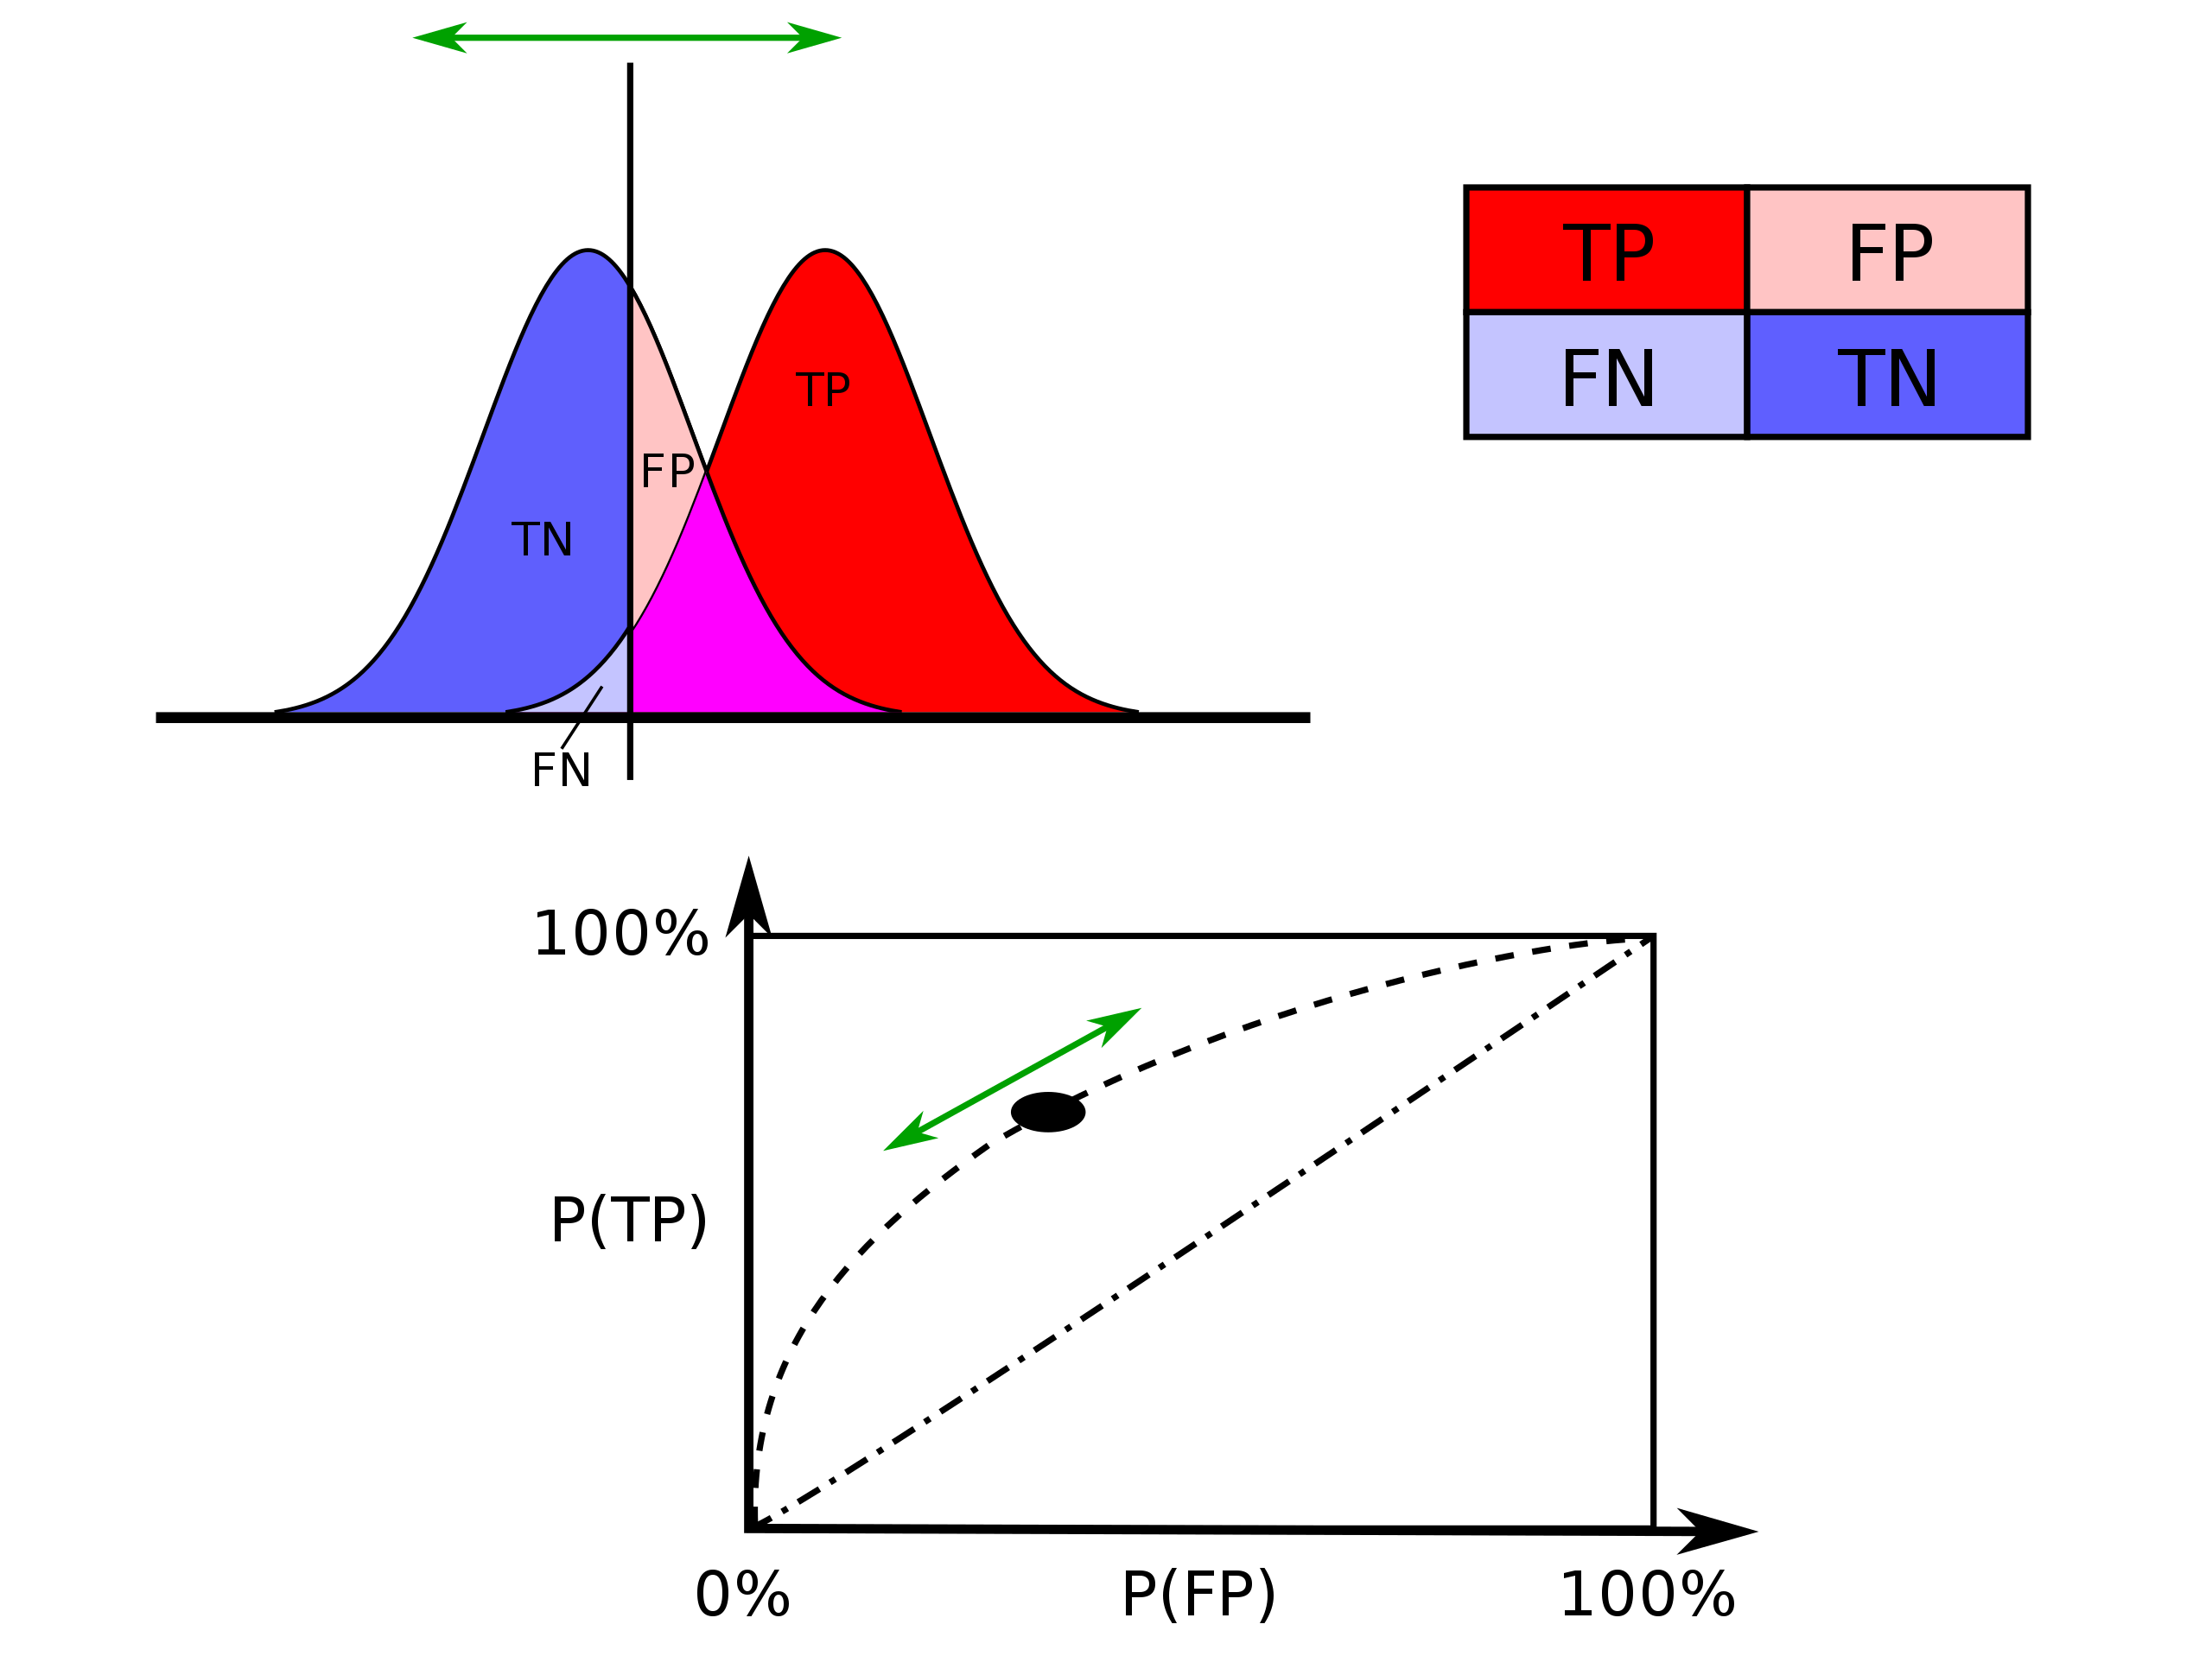

---

For binary classification problem, AUC gives information about how the classifier is compared to random guesses. If classifier is good, AUC will be close to 1. AUC is better measure of classifier performance than accuracy because it does not have bias on size of test or evaluation data. But Accuracy is always biased on size of test data. We usually split a portion of 0.2 of our dataset as test data. Accuracy is calculated based on the class distribution of test dataset or cross-validation, but this ratio may change when you apply the classifier to real life data, because the underlying class distribution has been changed or unknown. On the other hand, TP rate and FP rate which are used to calculate AUC will not be affected by class distribution changing. This is one of tha AUC measure advantages over Accuracy measure.

### 3.5.Random Forest

In [80]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Single_Fare', 'Cabin_Num', 'P3SorQ']
# 'Sex', 'Age', 'SibSp', 'Parch', 'Single_Fare', 'Cabin_Num', 'P3SorQ'

X_train = train_data.loc[:, features]
Y_train = train_data.loc[:, 'Survived']

X_test = test_data.loc[:, features]
Y_test = test_data.loc[:, 'Survived']

X_tt = data.loc[:, features]
Y_tt = data.loc[:, 'Survived']


#### Report:
Optimum features for Random Forest Classifier are selected.

### 3.5. Five Fold Cross Validation

In [66]:
K = 5
kf = KFold(n_splits=K, random_state=2)

# array of different number of trees
n_trees = np.arange(10, 500, 10)

# array of different depths
depths = np.arange(5, 25)

errors = []
params = []
for n_tree in n_trees:
    for depth in depths:
        error = 0
        for tr_index, ts_index in kf.split(data):

            X_tr = data.loc[tr_index, features]
            Y_tr = data.loc[tr_index, 'Survived']

            X_ts = data.loc[ts_index, features]
            Y_ts = data.loc[ts_index, 'Survived']

            # an instance of the class
            RF = RandomForestClassifier(n_estimators=n_tree, max_depth=depth, random_state=2)

            RF.fit(X_tr, Y_tr)

            error = error + 1 - RF.score(X_ts, Y_ts)
        print("n_tree = {0}, depth = {1}, error = {2}".format(n_tree, depth, error / K))
        errors.append(error / K)
        params.append((n_tree, depth))

n_tree = 10, depth = 5, error = 0.20198355407695684
n_tree = 10, depth = 6, error = 0.18513589856255094
n_tree = 10, depth = 7, error = 0.18961772644529534
n_tree = 10, depth = 8, error = 0.17725817588349757
n_tree = 10, depth = 9, error = 0.17277007093088942
n_tree = 10, depth = 10, error = 0.1806415165400791
n_tree = 10, depth = 11, error = 0.18514217563241478
n_tree = 10, depth = 12, error = 0.18625949406816897
n_tree = 10, depth = 13, error = 0.18511706735295963
n_tree = 10, depth = 14, error = 0.17837549431925176
n_tree = 10, depth = 15, error = 0.19411210846776716
n_tree = 10, depth = 16, error = 0.1884941309396774
n_tree = 10, depth = 17, error = 0.19074132195091326
n_tree = 10, depth = 18, error = 0.1828698763417237
n_tree = 10, depth = 19, error = 0.18511706735295969
n_tree = 10, depth = 20, error = 0.18399974891720544
n_tree = 10, depth = 21, error = 0.18961144937543156
n_tree = 10, depth = 22, error = 0.18961144937543156
n_tree = 10, depth = 23, error = 0.1884878538698136
n_

n_tree = 80, depth = 22, error = 0.1761283033080158
n_tree = 80, depth = 23, error = 0.1772518988136338
n_tree = 80, depth = 24, error = 0.17500470780239782
n_tree = 90, depth = 5, error = 0.17954302931391625
n_tree = 90, depth = 6, error = 0.18179649739501602
n_tree = 90, depth = 7, error = 0.1772832841629527
n_tree = 90, depth = 8, error = 0.17054798819910866
n_tree = 90, depth = 9, error = 0.16828196597828135
n_tree = 90, depth = 10, error = 0.17390622057623503
n_tree = 90, depth = 11, error = 0.17051660284978967
n_tree = 90, depth = 12, error = 0.1649174565312912
n_tree = 90, depth = 13, error = 0.16941183855376307
n_tree = 90, depth = 14, error = 0.16941183855376313
n_tree = 90, depth = 15, error = 0.1794802586152784
n_tree = 90, depth = 16, error = 0.18061640826062392
n_tree = 90, depth = 17, error = 0.17723934467390628
n_tree = 90, depth = 18, error = 0.17614085744774335
n_tree = 90, depth = 19, error = 0.17388738936664366
n_tree = 90, depth = 20, error = 0.17388738936664364
n_t

n_tree = 160, depth = 16, error = 0.17612830330801582
n_tree = 160, depth = 17, error = 0.17612202623815204
n_tree = 160, depth = 18, error = 0.1772518988136338
n_tree = 160, depth = 19, error = 0.17501098487226166
n_tree = 160, depth = 20, error = 0.17613458037787963
n_tree = 160, depth = 21, error = 0.17501098487226166
n_tree = 160, depth = 22, error = 0.17501726194212544
n_tree = 160, depth = 23, error = 0.1783754943192518
n_tree = 160, depth = 24, error = 0.17725189881363385
n_tree = 170, depth = 5, error = 0.18404996547611574
n_tree = 170, depth = 6, error = 0.17842571087816206
n_tree = 170, depth = 7, error = 0.168294520118009
n_tree = 170, depth = 8, error = 0.1694181156236269
n_tree = 170, depth = 9, error = 0.1660410520369092
n_tree = 170, depth = 10, error = 0.1649362877408825
n_tree = 170, depth = 11, error = 0.16490490239156358
n_tree = 170, depth = 12, error = 0.16267026552005523
n_tree = 170, depth = 13, error = 0.17614085744774338
n_tree = 170, depth = 14, error = 0.1772

n_tree = 240, depth = 10, error = 0.1682882430481451
n_tree = 240, depth = 11, error = 0.16603477496704538
n_tree = 240, depth = 12, error = 0.166047329106773
n_tree = 240, depth = 13, error = 0.16828824304814508
n_tree = 240, depth = 14, error = 0.17500470780239782
n_tree = 240, depth = 15, error = 0.17388111229677988
n_tree = 240, depth = 16, error = 0.18285732220199608
n_tree = 240, depth = 17, error = 0.17723934467390623
n_tree = 240, depth = 18, error = 0.1806226853304877
n_tree = 240, depth = 19, error = 0.17837549431925176
n_tree = 240, depth = 20, error = 0.1806289624003515
n_tree = 240, depth = 21, error = 0.17725817588349757
n_tree = 240, depth = 22, error = 0.1817462808361057
n_tree = 240, depth = 23, error = 0.17838177138911557
n_tree = 240, depth = 24, error = 0.17725817588349757
n_tree = 250, depth = 5, error = 0.18516728391186996
n_tree = 250, depth = 6, error = 0.1750612014311719
n_tree = 250, depth = 7, error = 0.16830707425773653
n_tree = 250, depth = 8, error = 0.164

n_tree = 310, depth = 24, error = 0.17726445295336135
n_tree = 320, depth = 5, error = 0.18740819785324214
n_tree = 320, depth = 6, error = 0.17842571087816209
n_tree = 320, depth = 7, error = 0.1750360931517168
n_tree = 320, depth = 8, error = 0.17053543405938104
n_tree = 320, depth = 9, error = 0.16829452011800888
n_tree = 320, depth = 10, error = 0.16717092461239091
n_tree = 320, depth = 11, error = 0.1671458163329357
n_tree = 320, depth = 12, error = 0.16940556148389932
n_tree = 320, depth = 13, error = 0.17164647542527145
n_tree = 320, depth = 14, error = 0.1694055614838994
n_tree = 320, depth = 15, error = 0.17612202623815204
n_tree = 320, depth = 16, error = 0.18286359927185988
n_tree = 320, depth = 17, error = 0.18061640826062395
n_tree = 320, depth = 18, error = 0.18174628083610572
n_tree = 320, depth = 19, error = 0.17949908982486978
n_tree = 320, depth = 20, error = 0.1806289624003515
n_tree = 320, depth = 21, error = 0.17838177138911554
n_tree = 320, depth = 22, error = 0.1

n_tree = 390, depth = 18, error = 0.18510451321323207
n_tree = 390, depth = 19, error = 0.18174000376624191
n_tree = 390, depth = 20, error = 0.18399347184734166
n_tree = 390, depth = 21, error = 0.1783754943192518
n_tree = 390, depth = 22, error = 0.17949908982486978
n_tree = 390, depth = 23, error = 0.1783754943192518
n_tree = 390, depth = 24, error = 0.1783754943192518
n_tree = 400, depth = 5, error = 0.18965538886447805
n_tree = 400, depth = 6, error = 0.17731466951227162
n_tree = 400, depth = 7, error = 0.1750423702215806
n_tree = 400, depth = 8, error = 0.17053543405938104
n_tree = 400, depth = 9, error = 0.1694118385537631
n_tree = 400, depth = 10, error = 0.16717092461239091
n_tree = 400, depth = 11, error = 0.1671458163329358
n_tree = 400, depth = 12, error = 0.16828196597828132
n_tree = 400, depth = 13, error = 0.17164647542527142
n_tree = 400, depth = 14, error = 0.1772518988136338
n_tree = 400, depth = 15, error = 0.17948025861527844
n_tree = 400, depth = 16, error = 0.1850

n_tree = 470, depth = 12, error = 0.16940556148389932
n_tree = 470, depth = 13, error = 0.17164647542527142
n_tree = 470, depth = 14, error = 0.17724562174376998
n_tree = 470, depth = 15, error = 0.17723934467390628
n_tree = 470, depth = 16, error = 0.18285104513213235
n_tree = 470, depth = 17, error = 0.18622183164898626
n_tree = 470, depth = 18, error = 0.18399347184734166
n_tree = 470, depth = 19, error = 0.18285732220199613
n_tree = 470, depth = 20, error = 0.18061013119076016
n_tree = 470, depth = 21, error = 0.18285732220199616
n_tree = 470, depth = 22, error = 0.18285732220199616
n_tree = 470, depth = 23, error = 0.18061640826062395
n_tree = 470, depth = 24, error = 0.18061640826062395
n_tree = 480, depth = 5, error = 0.18853179335886014
n_tree = 480, depth = 6, error = 0.17618479693678987
n_tree = 480, depth = 7, error = 0.17167158370472668
n_tree = 480, depth = 8, error = 0.16941811562362694
n_tree = 480, depth = 9, error = 0.16940556148389935
n_tree = 480, depth = 10, error =

#### Report:
Five fold cross validation is implemented on whole dataset for different n_trees(number of trees) and depths(with ranges specified above). Results are represented above.

### 3.5.Evaluating Random Forest Based on Cross Validation

In [26]:
min_error = min(errors)
best_n_tree, best_depth = params[np.argmin(errors)]

# an instance of the class
RF = RandomForestClassifier(n_estimators=best_n_tree, max_depth=best_depth, random_state=2)

RF.fit(X_train, Y_train)

RF_tr_Acc = RF.score(X_train, Y_train)
Y_pred = RF.predict(X_train)
tr_fscore = f1_score(Y_train, Y_pred)

RF_ts_Acc = RF.score(X_test, Y_test)
Y_pred = RF.predict(X_test)
ts_fscore = f1_score(Y_test, Y_pred)

print('------------------------------ Results ------------------------------')
print('Best Nubmer of Trees: \t\t\t\t{0}'.format(best_n_tree))
print('Best depth of Trees: \t\t\t\t{0}'.format(best_depth))
print('Min Error of 5 Fold Cross Validation: \t\t{0}'.format(min_error))
print('RF Training Accuracy: \t\t\t\t{0}'.format(RF_tr_Acc))
print('RF Training F1 Score: \t\t\t\t{0}'.format(tr_fscore))
print('RF Test Accuracy: \t\t\t\t{0}'.format(RF_ts_Acc))
print('RF Test F1 Score: \t\t\t\t{0}'.format(ts_fscore))
print('---------------------------------------------------------------------\n')

------------------------------ Results ------------------------------
Best Nubmer of Trees: 				490
Best depth of Trees: 				12
Min Error of 5 Fold Cross Validation: 		0.1626639884501915
RF Training Accuracy: 				0.9663394109396914
RF Training F1 Score: 				0.9557195571955719
RF Test Accuracy: 				0.8764044943820225
RF Test F1 Score: 				0.8307692307692308
---------------------------------------------------------------------



#### Report:
Best number of trees, Best depth of trees, Minimum error of cross validation, best F1 Scores and best acuuracies are reported above! random state is also specified to help us compare errors and choose the optimum parameters.

### 3.5.Evaluating Random Forest Based on Manually Tuned Hyper Parameters ( Best Result )

In [27]:
# an instance of the class
RF = RandomForestClassifier(n_estimators=220, max_depth=19, random_state=2)

RF.fit(X_train, Y_train)

RF_tr_Acc = RF.score(X_train, Y_train)

RF_ts_Acc = RF.score(X_test, Y_test)

RF_tt_Acc = RF.score(X_tt, Y_tt)

print('------------------------------ Results ------------------------------')
print('RF Training Accuracy: \t\t\t\t{0}'.format(RF_tr_Acc))
print('RF Test Accuracy: \t\t\t\t{0}'.format(RF_ts_Acc))
print('RF Total Accuracy: \t\t\t\t{0}'.format(RF_tt_Acc))
print('---------------------------------------------------------------------\n')

------------------------------ Results ------------------------------
RF Training Accuracy: 				0.9859747545582047
RF Test Accuracy: 				0.8932584269662921
RF Total Accuracy: 				0.9674523007856342
---------------------------------------------------------------------



#### Report:
Although five fold cross validation proposed good parameters, We found better parameters Manually and you can see the best results of Random Forest method above. The best values of 'n_estimators' and 'max_depth' are 220 and 19 respectively.

### 3.6.Artificial Neural Network

In [33]:
features = ['Sex', 'Age', 'SibSp', 'Emb1', 'Partner', 'Single_Fare', 'NN_Cabin', 'P3SorQ']
# az = 'Sex', 'Age', 'SibSp', 'Parch', 'Single_Fare', 'Cabin_Num', 'P3SorQ'
# bestf1 = 'Sex', 'Age', 'SibSp', 'Emb1', 'Partner', 'Single_Fare', 'NN_Cabin', 'P3SorQ'
# bestf2 = 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Emb1', 'Emb2', 'Common_Ticket'
# bestf3&4 = 'Sex', 'Age', 'SibSp', 'Emb1', 'Partner', 'Single_Fare', 'NN_Cabin', 'P3SorQ'

X_train = train_data.loc[:, features]
Y_train = train_data.loc[:, 'Survived']

X_test = test_data.loc[:, features]
Y_test = test_data.loc[:, 'Survived']

X_tt = data.loc[:, features]
Y_tt = data.loc[:, 'Survived']

# feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_tt = scaler.transform(X_tt)

#### Report:
The optimum features for MLP are selected and features are scaled.

### 3.6.1.Tuning Hyper Parameters for (20, 10) 

In [34]:
# array of different learning rates
l_rates = [1e-4, 0.5e-3, 1e-3, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

# array of different alphas
alphas = np.linspace(0.0001, 0.01, 100)

errors = []
params = []
for lr in l_rates:
    for alpha in alphas:
       
        MLP = MLPClassifier(hidden_layer_sizes=(20, 10), alpha=alpha, batch_size=32,
                learning_rate_init=lr, max_iter=20, random_state=2)

        MLP.fit(X_train, Y_train)

        error = 1 - MLP.score(X_test, Y_test)
        print("learning rate = {0}, alpha = {1}, error = {2}".format(lr, alpha, error))
        errors.append(error)
        params.append((lr, alpha))

learning rate = 0.0001, alpha = 0.0001, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0002, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.00030000000000000003, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0004, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0005, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0006000000000000001, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0007000000000000001, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0008, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0009000000000000001, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.001, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0011, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0012000000000000001, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.0013000000000000002, error = 0.3539325842696629
learning rate = 0.0001, alpha = 0.00140

learning rate = 0.0005, alpha = 0.0015, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0016, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0017000000000000001, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0018000000000000002, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0019000000000000002, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.002, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0021, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0022, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0023, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0024, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0025, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0026, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0027, error = 0.1685393258426966
learning rate = 0.0005, alpha = 0.0028, error = 0.1685393258426966
learning rate = 0.

learning rate = 0.001, alpha = 0.003, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0031, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0032, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0033, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0034, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0035, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0036, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0037, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0038, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0039, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.004, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0041, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.004200000000000001, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.004300000000000001, error = 0.1404494382022472
learning rate = 0.001, alpha = 0.0044, error = 0.1

learning rate = 0.005, alpha = 0.004600000000000001, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0047, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0048000000000000004, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.004900000000000001, error = 0.101123595505618
learning rate = 0.005, alpha = 0.005, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0051, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.005200000000000001, error = 0.1123595505617978
learning rate = 0.005, alpha = 0.005300000000000001, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0054, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0055000000000000005, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.005600000000000001, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0057, error = 0.1067415730337079
learning rate = 0.005, alpha = 0.0058000000000000005, error = 0.1067415730337079
learning rate = 0.005, alpha 

learning rate = 0.01, alpha = 0.006200000000000001, error = 0.1123595505617978
learning rate = 0.01, alpha = 0.006300000000000001, error = 0.1179775280898876
learning rate = 0.01, alpha = 0.0064, error = 0.1123595505617978
learning rate = 0.01, alpha = 0.006500000000000001, error = 0.1067415730337079
learning rate = 0.01, alpha = 0.006600000000000001, error = 0.101123595505618
learning rate = 0.01, alpha = 0.0067, error = 0.1179775280898876
learning rate = 0.01, alpha = 0.0068000000000000005, error = 0.1292134831460674
learning rate = 0.01, alpha = 0.006900000000000001, error = 0.1179775280898876
learning rate = 0.01, alpha = 0.007000000000000001, error = 0.1067415730337079
learning rate = 0.01, alpha = 0.0071, error = 0.1123595505617978
learning rate = 0.01, alpha = 0.007200000000000001, error = 0.1235955056179775
learning rate = 0.01, alpha = 0.007300000000000001, error = 0.1123595505617978
learning rate = 0.01, alpha = 0.0074, error = 0.1123595505617978
learning rate = 0.01, alpha =

learning rate = 0.02, alpha = 0.0078000000000000005, error = 0.1179775280898876
learning rate = 0.02, alpha = 0.0079, error = 0.1123595505617978
learning rate = 0.02, alpha = 0.008, error = 0.1123595505617978
learning rate = 0.02, alpha = 0.0081, error = 0.1123595505617978
learning rate = 0.02, alpha = 0.008199999999999999, error = 0.1235955056179775
learning rate = 0.02, alpha = 0.0083, error = 0.1123595505617978
learning rate = 0.02, alpha = 0.0084, error = 0.1179775280898876
learning rate = 0.02, alpha = 0.0085, error = 0.1067415730337079
learning rate = 0.02, alpha = 0.0086, error = 0.1235955056179775
learning rate = 0.02, alpha = 0.0087, error = 0.1067415730337079
learning rate = 0.02, alpha = 0.0088, error = 0.1123595505617978
learning rate = 0.02, alpha = 0.0089, error = 0.1292134831460674
learning rate = 0.02, alpha = 0.009, error = 0.1123595505617978
learning rate = 0.02, alpha = 0.0091, error = 0.1179775280898876
learning rate = 0.02, alpha = 0.0092, error = 0.117977528089887

learning rate = 0.03, alpha = 0.0096, error = 0.1179775280898876
learning rate = 0.03, alpha = 0.0097, error = 0.1179775280898876
learning rate = 0.03, alpha = 0.0098, error = 0.1235955056179775
learning rate = 0.03, alpha = 0.009899999999999999, error = 0.1235955056179775
learning rate = 0.03, alpha = 0.01, error = 0.1179775280898876
learning rate = 0.04, alpha = 0.0001, error = 0.1123595505617978
learning rate = 0.04, alpha = 0.0002, error = 0.1573033707865169
learning rate = 0.04, alpha = 0.00030000000000000003, error = 0.1235955056179775
learning rate = 0.04, alpha = 0.0004, error = 0.1235955056179775
learning rate = 0.04, alpha = 0.0005, error = 0.1235955056179775
learning rate = 0.04, alpha = 0.0006000000000000001, error = 0.1179775280898876
learning rate = 0.04, alpha = 0.0007000000000000001, error = 0.1123595505617978
learning rate = 0.04, alpha = 0.0008, error = 0.1179775280898876
learning rate = 0.04, alpha = 0.0009000000000000001, error = 0.1179775280898876
learning rate = 0

learning rate = 0.05, alpha = 0.0014000000000000002, error = 0.1179775280898876
learning rate = 0.05, alpha = 0.0015, error = 0.1179775280898876
learning rate = 0.05, alpha = 0.0016, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0017000000000000001, error = 0.101123595505618
learning rate = 0.05, alpha = 0.0018000000000000002, error = 0.1292134831460674
learning rate = 0.05, alpha = 0.0019000000000000002, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.002, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0021, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0022, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0023, error = 0.1179775280898876
learning rate = 0.05, alpha = 0.0024, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0025, error = 0.1348314606741573
learning rate = 0.05, alpha = 0.0026, error = 0.1292134831460674
learning rate = 0.05, alpha = 0.0027, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.

learning rate = 0.06, alpha = 0.0032, error = 0.1292134831460674
learning rate = 0.06, alpha = 0.0033, error = 0.1123595505617978
learning rate = 0.06, alpha = 0.0034, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.0035, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.0036, error = 0.1460674157303371
learning rate = 0.06, alpha = 0.0037, error = 0.1292134831460674
learning rate = 0.06, alpha = 0.0038, error = 0.1348314606741573
learning rate = 0.06, alpha = 0.0039, error = 0.1292134831460674
learning rate = 0.06, alpha = 0.004, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.0041, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.004200000000000001, error = 0.1460674157303371
learning rate = 0.06, alpha = 0.004300000000000001, error = 0.1292134831460674
learning rate = 0.06, alpha = 0.0044, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.0045000000000000005, error = 0.1123595505617978
learning rate = 0.06, alpha = 0.0046000000000000

learning rate = 0.07, alpha = 0.005, error = 0.1348314606741573
learning rate = 0.07, alpha = 0.0051, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.005200000000000001, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.005300000000000001, error = 0.1235955056179775
learning rate = 0.07, alpha = 0.0054, error = 0.1123595505617978
learning rate = 0.07, alpha = 0.0055000000000000005, error = 0.1179775280898876
learning rate = 0.07, alpha = 0.005600000000000001, error = 0.1235955056179775
learning rate = 0.07, alpha = 0.0057, error = 0.1179775280898876
learning rate = 0.07, alpha = 0.0058000000000000005, error = 0.1179775280898876
learning rate = 0.07, alpha = 0.005900000000000001, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.006, error = 0.1348314606741573
learning rate = 0.07, alpha = 0.0061, error = 0.1235955056179775
learning rate = 0.07, alpha = 0.006200000000000001, error = 0.1348314606741573
learning rate = 0.07, alpha = 0.006300000000000001, error

learning rate = 0.08, alpha = 0.0068000000000000005, error = 0.1404494382022472
learning rate = 0.08, alpha = 0.006900000000000001, error = 0.1179775280898876
learning rate = 0.08, alpha = 0.007000000000000001, error = 0.1123595505617978
learning rate = 0.08, alpha = 0.0071, error = 0.1235955056179775
learning rate = 0.08, alpha = 0.007200000000000001, error = 0.1179775280898876
learning rate = 0.08, alpha = 0.007300000000000001, error = 0.1404494382022472
learning rate = 0.08, alpha = 0.0074, error = 0.1292134831460674
learning rate = 0.08, alpha = 0.007500000000000001, error = 0.1404494382022472
learning rate = 0.08, alpha = 0.007600000000000001, error = 0.1404494382022472
learning rate = 0.08, alpha = 0.0077, error = 0.1292134831460674
learning rate = 0.08, alpha = 0.0078000000000000005, error = 0.1179775280898876
learning rate = 0.08, alpha = 0.0079, error = 0.1235955056179775
learning rate = 0.08, alpha = 0.008, error = 0.1179775280898876
learning rate = 0.08, alpha = 0.0081, erro

learning rate = 0.09, alpha = 0.0085, error = 0.1573033707865169
learning rate = 0.09, alpha = 0.0086, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0087, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0088, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0089, error = 0.1179775280898876
learning rate = 0.09, alpha = 0.009, error = 0.1123595505617978
learning rate = 0.09, alpha = 0.0091, error = 0.1292134831460674
learning rate = 0.09, alpha = 0.0092, error = 0.1179775280898876
learning rate = 0.09, alpha = 0.0093, error = 0.1573033707865169
learning rate = 0.09, alpha = 0.0094, error = 0.1404494382022472
learning rate = 0.09, alpha = 0.0095, error = 0.1292134831460674
learning rate = 0.09, alpha = 0.0096, error = 0.1797752808988764
learning rate = 0.09, alpha = 0.0097, error = 0.1741573033707865
learning rate = 0.09, alpha = 0.0098, error = 0.1629213483146067
learning rate = 0.09, alpha = 0.009899999999999999, error = 0.1179775280898876
learning rat

#### Report:
To tune learning rate and alpha(regularization penalty coefficient) for (20, 10) as hidden layers, We evaluate accuracy of trained model on test dataset for different learning rates and alpha values. Results are represented above.

### 3.6.1.Evaluating MLP ( hidden_layer_sizes=(20, 10) )

In [35]:
min_error = min(errors)
best_lr, best_alpha = params[np.argmin(errors)]

# an instance of the class
MLP = MLPClassifier(hidden_layer_sizes=(20, 10), alpha=best_alpha, batch_size=32,
                   learning_rate_init=best_lr, max_iter=20, random_state=2)

MLP.fit(X_train, Y_train)

MLP_tr_Acc = MLP.score(X_train, Y_train)

MLP_ts_Acc = MLP.score(X_test, Y_test)


print('------------------------------ Results for (20, 10) ------------------------------')
print('Best learning rate: \t\t\t\t{0}'.format(best_lr))
print('Best alpha: \t\t\t\t\t{0}'.format(best_alpha))
print('Min Error of Tuning Process: \t\t\t{0}'.format(min_error))
print('MLP Training Accuracy: \t\t\t\t{0}'.format(MLP_tr_Acc))
print('MLP Test Accuracy: \t\t\t\t{0}'.format(MLP_ts_Acc))
print('----------------------------------------------------------------------------------\n')

------------------------------ Results for (20, 10) ------------------------------
Best learning rate: 				0.02
Best alpha: 					0.0001
Min Error of Tuning Process: 			0.0955056179775281
MLP Training Accuracy: 				0.8373071528751753
MLP Test Accuracy: 				0.9044943820224719
----------------------------------------------------------------------------------



#### Report:
Best learning rate, best alpha, minimum error of tuning process and accuracies of (20, 10) hidden layers are calculated above.

### 3.6.1.Tuning Hyper Parameters for (100, 50)

In [36]:
# array of different learning rates
l_rates = [1e-4, 0.5e-3, 1e-3, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

# array of different alphas
alphas = np.linspace(0.0001, 0.01, 100)

errors = []
params = []
for lr in l_rates:
    for alpha in alphas:
       
        MLP = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=alpha, batch_size=32,
                learning_rate_init=lr, max_iter=20, random_state=2)

        MLP.fit(X_train, Y_train)

        error = 1 - MLP.score(X_test, Y_test)
        print("learning rate = {0}, alpha = {1}, error = {2}".format(lr, alpha, error))
        errors.append(error)
        params.append((lr, alpha))

learning rate = 0.0001, alpha = 0.0001, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0002, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.00030000000000000003, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0004, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0005, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0006000000000000001, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0007000000000000001, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0008, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0009000000000000001, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.001, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0011, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0012000000000000001, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.0013000000000000002, error = 0.1573033707865169
learning rate = 0.0001, alpha = 0.00140

learning rate = 0.0005, alpha = 0.0015, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0016, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0017000000000000001, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0018000000000000002, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0019000000000000002, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.002, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0021, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0022, error = 0.1123595505617978
learning rate = 0.0005, alpha = 0.0023, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0024, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0025, error = 0.1123595505617978
learning rate = 0.0005, alpha = 0.0026, error = 0.1123595505617978
learning rate = 0.0005, alpha = 0.0027, error = 0.1179775280898876
learning rate = 0.0005, alpha = 0.0028, error = 0.1179775280898876
learning rate = 0.

learning rate = 0.001, alpha = 0.003, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0031, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0032, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0033, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0034, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0035, error = 0.1067415730337079
learning rate = 0.001, alpha = 0.0036, error = 0.1179775280898876
learning rate = 0.001, alpha = 0.0037, error = 0.1179775280898876
learning rate = 0.001, alpha = 0.0038, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0039, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.004, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0041, error = 0.1067415730337079
learning rate = 0.001, alpha = 0.004200000000000001, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.004300000000000001, error = 0.1123595505617978
learning rate = 0.001, alpha = 0.0044, error = 0.1

learning rate = 0.005, alpha = 0.004600000000000001, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.0047, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.0048000000000000004, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.004900000000000001, error = 0.1292134831460674
learning rate = 0.005, alpha = 0.005, error = 0.1292134831460674
learning rate = 0.005, alpha = 0.0051, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.005200000000000001, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.005300000000000001, error = 0.1292134831460674
learning rate = 0.005, alpha = 0.0054, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.0055000000000000005, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.005600000000000001, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.0057, error = 0.1348314606741573
learning rate = 0.005, alpha = 0.0058000000000000005, error = 0.1292134831460674
learning rate = 0.005, alpha

learning rate = 0.01, alpha = 0.006200000000000001, error = 0.1404494382022472
learning rate = 0.01, alpha = 0.006300000000000001, error = 0.1404494382022472
learning rate = 0.01, alpha = 0.0064, error = 0.1460674157303371
learning rate = 0.01, alpha = 0.006500000000000001, error = 0.1460674157303371
learning rate = 0.01, alpha = 0.006600000000000001, error = 0.1348314606741573
learning rate = 0.01, alpha = 0.0067, error = 0.1292134831460674
learning rate = 0.01, alpha = 0.0068000000000000005, error = 0.1348314606741573
learning rate = 0.01, alpha = 0.006900000000000001, error = 0.1348314606741573
learning rate = 0.01, alpha = 0.007000000000000001, error = 0.1348314606741573
learning rate = 0.01, alpha = 0.0071, error = 0.151685393258427
learning rate = 0.01, alpha = 0.007200000000000001, error = 0.1460674157303371
learning rate = 0.01, alpha = 0.007300000000000001, error = 0.1460674157303371
learning rate = 0.01, alpha = 0.0074, error = 0.1404494382022472
learning rate = 0.01, alpha =

learning rate = 0.02, alpha = 0.0078000000000000005, error = 0.1404494382022472
learning rate = 0.02, alpha = 0.0079, error = 0.1235955056179775
learning rate = 0.02, alpha = 0.008, error = 0.1404494382022472
learning rate = 0.02, alpha = 0.0081, error = 0.1292134831460674
learning rate = 0.02, alpha = 0.008199999999999999, error = 0.1348314606741573
learning rate = 0.02, alpha = 0.0083, error = 0.1404494382022472
learning rate = 0.02, alpha = 0.0084, error = 0.1235955056179775
learning rate = 0.02, alpha = 0.0085, error = 0.1348314606741573
learning rate = 0.02, alpha = 0.0086, error = 0.1348314606741573
learning rate = 0.02, alpha = 0.0087, error = 0.1348314606741573
learning rate = 0.02, alpha = 0.0088, error = 0.1404494382022472
learning rate = 0.02, alpha = 0.0089, error = 0.1235955056179775
learning rate = 0.02, alpha = 0.009, error = 0.1067415730337079
learning rate = 0.02, alpha = 0.0091, error = 0.1348314606741573
learning rate = 0.02, alpha = 0.0092, error = 0.162921348314606

learning rate = 0.03, alpha = 0.0096, error = 0.1460674157303371
learning rate = 0.03, alpha = 0.0097, error = 0.1292134831460674
learning rate = 0.03, alpha = 0.0098, error = 0.151685393258427
learning rate = 0.03, alpha = 0.009899999999999999, error = 0.151685393258427
learning rate = 0.03, alpha = 0.01, error = 0.1404494382022472
learning rate = 0.04, alpha = 0.0001, error = 0.1404494382022472
learning rate = 0.04, alpha = 0.0002, error = 0.1460674157303371
learning rate = 0.04, alpha = 0.00030000000000000003, error = 0.1404494382022472
learning rate = 0.04, alpha = 0.0004, error = 0.1573033707865169
learning rate = 0.04, alpha = 0.0005, error = 0.1067415730337079
learning rate = 0.04, alpha = 0.0006000000000000001, error = 0.1573033707865169
learning rate = 0.04, alpha = 0.0007000000000000001, error = 0.1235955056179775
learning rate = 0.04, alpha = 0.0008, error = 0.1179775280898876
learning rate = 0.04, alpha = 0.0009000000000000001, error = 0.1460674157303371
learning rate = 0.0

learning rate = 0.05, alpha = 0.0013000000000000002, error = 0.1404494382022472
learning rate = 0.05, alpha = 0.0014000000000000002, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0015, error = 0.1292134831460674
learning rate = 0.05, alpha = 0.0016, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0017000000000000001, error = 0.1348314606741573
learning rate = 0.05, alpha = 0.0018000000000000002, error = 0.1292134831460674
learning rate = 0.05, alpha = 0.0019000000000000002, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.002, error = 0.1404494382022472
learning rate = 0.05, alpha = 0.0021, error = 0.1348314606741573
learning rate = 0.05, alpha = 0.0022, error = 0.1123595505617978
learning rate = 0.05, alpha = 0.0023, error = 0.1629213483146067
learning rate = 0.05, alpha = 0.0024, error = 0.1348314606741573
learning rate = 0.05, alpha = 0.0025, error = 0.1235955056179775
learning rate = 0.05, alpha = 0.0026, error = 0.1179775280898876
learning rate = 

learning rate = 0.06, alpha = 0.0031, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.0032, error = 0.1460674157303371
learning rate = 0.06, alpha = 0.0033, error = 0.1292134831460674
learning rate = 0.06, alpha = 0.0034, error = 0.1179775280898876
learning rate = 0.06, alpha = 0.0035, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.0036, error = 0.151685393258427
learning rate = 0.06, alpha = 0.0037, error = 0.1292134831460674
learning rate = 0.06, alpha = 0.0038, error = 0.1404494382022472
learning rate = 0.06, alpha = 0.0039, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.004, error = 0.1348314606741573
learning rate = 0.06, alpha = 0.0041, error = 0.1235955056179775
learning rate = 0.06, alpha = 0.004200000000000001, error = 0.1404494382022472
learning rate = 0.06, alpha = 0.004300000000000001, error = 0.1179775280898876
learning rate = 0.06, alpha = 0.0044, error = 0.1348314606741573
learning rate = 0.06, alpha = 0.0045000000000000005, error = 0.1

learning rate = 0.07, alpha = 0.004900000000000001, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.005, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.0051, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.005200000000000001, error = 0.1235955056179775
learning rate = 0.07, alpha = 0.005300000000000001, error = 0.1235955056179775
learning rate = 0.07, alpha = 0.0054, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.0055000000000000005, error = 0.1460674157303371
learning rate = 0.07, alpha = 0.005600000000000001, error = 0.1235955056179775
learning rate = 0.07, alpha = 0.0057, error = 0.1404494382022472
learning rate = 0.07, alpha = 0.0058000000000000005, error = 0.1348314606741573
learning rate = 0.07, alpha = 0.005900000000000001, error = 0.1179775280898876
learning rate = 0.07, alpha = 0.006, error = 0.1292134831460674
learning rate = 0.07, alpha = 0.0061, error = 0.1348314606741573
learning rate = 0.07, alpha = 0.006200000000000001, error

learning rate = 0.08, alpha = 0.006600000000000001, error = 0.1235955056179775
learning rate = 0.08, alpha = 0.0067, error = 0.1460674157303371
learning rate = 0.08, alpha = 0.0068000000000000005, error = 0.1348314606741573
learning rate = 0.08, alpha = 0.006900000000000001, error = 0.1348314606741573
learning rate = 0.08, alpha = 0.007000000000000001, error = 0.1235955056179775
learning rate = 0.08, alpha = 0.0071, error = 0.1292134831460674
learning rate = 0.08, alpha = 0.007200000000000001, error = 0.1348314606741573
learning rate = 0.08, alpha = 0.007300000000000001, error = 0.1292134831460674
learning rate = 0.08, alpha = 0.0074, error = 0.1179775280898876
learning rate = 0.08, alpha = 0.007500000000000001, error = 0.151685393258427
learning rate = 0.08, alpha = 0.007600000000000001, error = 0.1348314606741573
learning rate = 0.08, alpha = 0.0077, error = 0.1235955056179775
learning rate = 0.08, alpha = 0.0078000000000000005, error = 0.1460674157303371
learning rate = 0.08, alpha 

learning rate = 0.09, alpha = 0.0083, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0084, error = 0.1179775280898876
learning rate = 0.09, alpha = 0.0085, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0086, error = 0.1573033707865169
learning rate = 0.09, alpha = 0.0087, error = 0.1179775280898876
learning rate = 0.09, alpha = 0.0088, error = 0.1292134831460674
learning rate = 0.09, alpha = 0.0089, error = 0.1235955056179775
learning rate = 0.09, alpha = 0.009, error = 0.1067415730337079
learning rate = 0.09, alpha = 0.0091, error = 0.1404494382022472
learning rate = 0.09, alpha = 0.0092, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0093, error = 0.1404494382022472
learning rate = 0.09, alpha = 0.0094, error = 0.1404494382022472
learning rate = 0.09, alpha = 0.0095, error = 0.1292134831460674
learning rate = 0.09, alpha = 0.0096, error = 0.1348314606741573
learning rate = 0.09, alpha = 0.0097, error = 0.1404494382022472
learning rate = 0.09, alph

#### Report:
To tune learning rate and alpha(regularization penalty coefficient) for (100, 50) as hidden layers, We evaluate accuracy of trained model on test dataset for different learning rates and alpha values. Results are represented above.

### 3.6.1.Evaluating MLP ( hidden_layer_sizes=(100, 50) )

In [37]:
min_error2 = min(errors)
best_lr2, best_alpha2 = params[np.argmin(errors)]

# an instance of the class
MLP = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=best_alpha2, batch_size=32,
                   learning_rate_init=best_lr2, max_iter=20, random_state=2)

MLP.fit(X_train, Y_train)

MLP_tr_Acc2 = MLP.score(X_train, Y_train)

MLP_ts_Acc2 = MLP.score(X_test, Y_test)

print('------------------------------ Results for (100, 50) ------------------------------')
print('Best learning rate: \t\t\t\t{0}'.format(best_lr2))
print('Best alpha: \t\t\t\t\t{0}'.format(best_alpha2))
print('Min Error of 5 Fold Cross Validation: \t\t{0}'.format(min_error2))
print('MLP Training Accuracy: \t\t\t\t{0}'.format(MLP_tr_Acc2))
print('MLP Test Accuracy: \t\t\t\t{0}'.format(MLP_ts_Acc2))
print('----------------------------------------------------------------------------------\n')

------------------------------ Results for (100, 50) ------------------------------
Best learning rate: 				0.05
Best alpha: 					0.0001
Min Error of 5 Fold Cross Validation: 		0.101123595505618
MLP Training Accuracy: 				0.8345021037868162
MLP Test Accuracy: 				0.898876404494382
----------------------------------------------------------------------------------



#### Report:
Best learning rate, best alpha, minimum error of tuning process and accuracies of (100, 50) hidden layers are calculated above.

### 3.6.Last Evaluation

------------------------------ Best Results ------------------------------
MLP Training Accuracy: 				0.8373071528751753
MLP Test Accuracy: 				0.9044943820224719
--------------------------------------------------------------------------



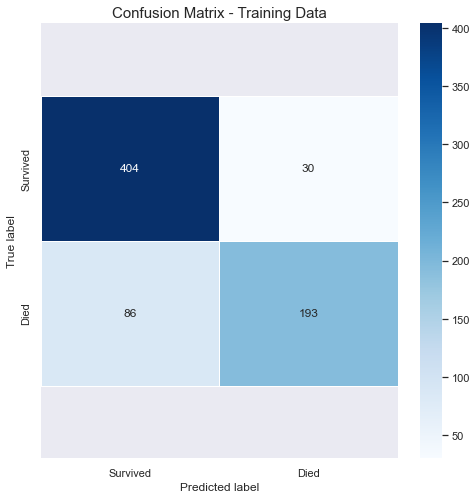

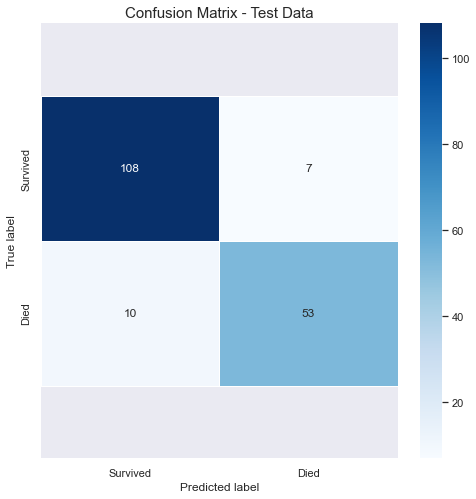

In [38]:
# an instance of the class
MLP = MLPClassifier(hidden_layer_sizes=(20, 10), alpha=best_alpha, batch_size=32,
                   learning_rate_init=best_lr, max_iter=20, random_state=2)

MLP.fit(X_train, Y_train)

MLP_tr_Acc = MLP.score(X_train, Y_train)

MLP_ts_Acc = MLP.score(X_test, Y_test)

print('------------------------------ Best Results ------------------------------')
print('MLP Training Accuracy: \t\t\t\t{0}'.format(MLP_tr_Acc))
print('MLP Test Accuracy: \t\t\t\t{0}'.format(MLP_ts_Acc))
print('--------------------------------------------------------------------------\n')

# confusion matrix for train data
Y_pred = MLP.predict(X_train)
cn_matrix = confusion_matrix(Y_train, Y_pred)
df_cm = pd.DataFrame(cn_matrix, index=['Survived', 'Died'], columns=['Survived', 'Died'])

fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(df_cm, annot=True, linewidths=.5, cmap='Blues', fmt='g')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix - Training Data', size=15)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# confusion matrix for test data
Y_pred = MLP.predict(X_test)
cn_matrix = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cn_matrix, index=['Survived', 'Died'], columns=['Survived', 'Died'])

fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(df_cm, annot=True, linewidths=.5, cmap='Blues', fmt='g')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix - Test Data', size=15)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#### Reports:
As observed in previous sections, MLP with (20, 10) hidden layer performed better on both training and test datasets. In (100, 50) case we have more weights in both hidden layers as compared to (20, 10) case. we also use MLP with just 20 epochs which is a small number, and we faced converging problem during evaluating each MLP model most of the time. So in (100, 50) case, dimension of our objective function is far more larger than (20, 10) case, and this high dimension makes it difficult for objective function to converge to its optimum value. So we expect that (100, 50) model performs better for higher epoch values, but for only 20 epochs, (20, 10) model has better accuarcies. Best accuracies obtained by MLP are represented above.

---

Confusion matrix of both training and test data are provided.

### Overal Results

In [94]:
methods = ['Logistic Regression', 'KNN', 'SVM', 'Gaussian-NB', 'Random Forest', 'Neural Networks']
tr_Accs = [LR_tr_Acc, KNN_tr_Acc, SVM_tr_Acc, GNB_tr_Acc, RF_tr_Acc, MLP_tr_Acc]
ts_Accs = [LR_ts_Acc, KNN_ts_Acc, SVM_ts_Acc, GNB_ts_Acc, RF_ts_Acc, MLP_ts_Acc]
Accuracies = pd.DataFrame({'Method': methods,
                           'Training Accuracies': tr_Accs,
                           'Test Accuracies': ts_Accs})
display(Accuracies)

,Method,Training Accuracies,Test Accuracies
0,Logistic Regression,0.809257,0.865169
1,KNN,0.873773,0.915730
2,SVM,0.936886,0.876404
3,Gaussian-NB,0.805049,0.859551
4,Random Forest,0.985975,0.893258
5,Neural Networks,0.837307,0.904494


#### Report:
As the last step, All training and test accuracies are gathered in a table!